# GUEST MANAGEMENT SYSTEM

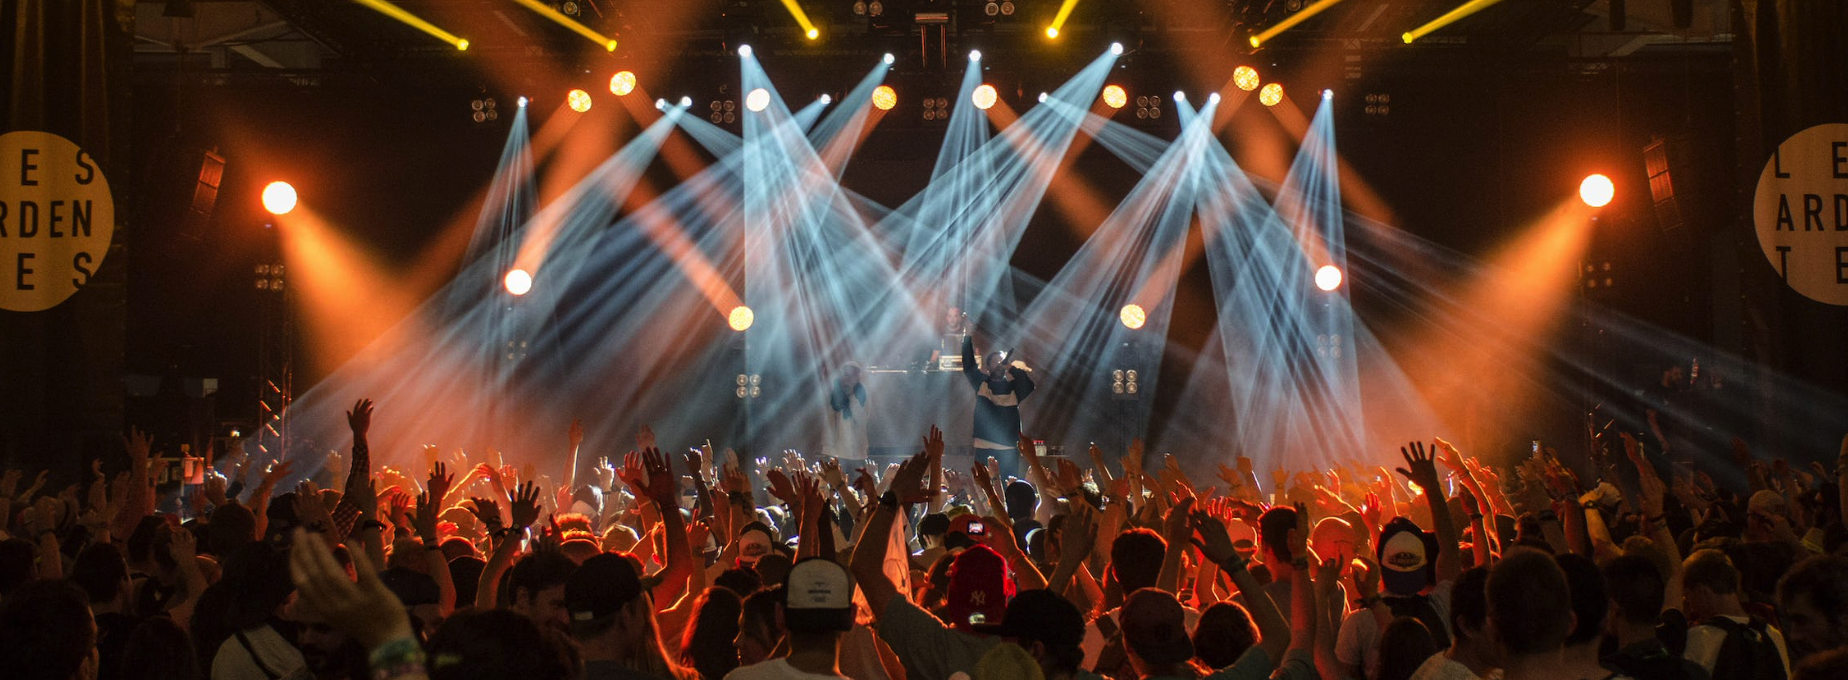

### HEMANT THAPA

The User Data Management System is a program that allows users to perform operations on a data set containing user data. The data set can be saved in a file and accessed by the program. The operations that can be performed include:

1. Viewing the data set - The user can view the data stored in the file.

2. Adding data to the data set - The user can add new user data to the data set.

3. Editing data in the data set - The user can edit the existing data of a specific user in the data set.

4. Deleting data from the data set - The user can delete the data of a specific user from the data set.

5. Quitting the program - The user can quit the program at any time.

The system validates the user inputs and ensures that only valid data is stored in the file. The user data includes information such as name, surname, birth date, age, email, and phone number. The program uses the Python programming language and makes use of functions, loops, and conditional statements.

In [1]:
import os
from datetime import datetime

## TEST 1 - ADDING DETAILS

In [33]:
def print_user_data(user_data):
    index = user_data.get("index", "N/A")
    name = user_data.get("name", "N/A")
    surname = user_data.get("surname", "N/A")
    birth_date = user_data.get("birth_date", "N/A")
    age = user_data.get("age", "N/A")
    email = user_data.get("email", "N/A")
    phone = user_data.get("phone", "N/A")
    print(f"Index: {index}, Name: {name}, Surname: {surname}, Birth date: {birth_date}, Age: {age}, Email: {email}, Phone: {phone}")
    
def load_users(file_path):
    users = []
    if os.path.exists(file_path):
        with open(file_path, "r") as file:
            for line in file:
                if not line.strip():  # Skip empty lines
                    continue

                user_data = {}
                fields = line.strip().split(", ")

                for field in fields:
                    if ": " not in field:  # Skip fields without a colon
                        continue

                    key, value = field.split(": ")
                    user_data[key.strip()] = value.strip()
                
                if user_data:  # Append non-empty user data
                    users.append(user_data)

    return users



def calculate_age(birth_date):
    today = datetime.today()
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    return age


def save_users(file_path, users):
    with open(file_path, "w") as file:
        for user_data in users:
            line = ", ".join(f"{key}: {value}" for key, value in user_data.items())
            file.write(line + "\n")

file_path = "users.txt"
users = load_users(file_path)

while True:
    action = input("What do you want to do? (view/add/edit/delete/quit): ").lower()
    if action in ["quit", "exit"]:
        break
    elif action == "view":
        if not users:
            print("File is empty.")
        else:
            for user_data in users:
                print_user_data(user_data)

            
    elif action == "add":
        while True:
            birth_date_input = input("What is your birth date? (dd-mm-yyyy): ")
            if birth_date_input == ["quit", "exit"]:
                break
            try:
                birth_date = datetime.strptime(birth_date_input, "%d-%m-%Y")
                age = calculate_age(birth_date)
                if age < 18:
                    print("Sorry, you aren't old enough")
                else:
                    index = len(users) + 1
                    name = input("What is your name?: ")
                    if name == ["quit", "exit"]:
                        break
                    surname = input("What is your surname?: ")
                    if surname == ["quit", "exit"]:
                        break
                    email = input("What is your email address? (optional): ")
                    if email == ["quit", "exit"]:
                        break
                    phone = input("What is your phone number? (optional): ")
                    if phone == ["quit", "exit"]:
                        break
                    users.append({"index": index, "name": name, "surname": surname, "birth_date": birth_date.strftime("%d-%m-%Y"), "age": age, "email": email, "phone": phone})
                    save_users(file_path, users)
                    print("User data added to file.")
                    break
            except ValueError:
                print("Invalid input. Please enter a valid birth date.")



    elif action == "edit":
        user_input = input("What is the index of the user you want to edit?: ")
        if user_input == ["quit", "exit"]:
            break
        elif user_input.isdigit():
            index = int(user_input)
            found_user = False
            for user_data in users:
                if user_data.get("index") == str(index):
                    new_name = input("What is the new name?: ")
                    if new_name == ["quit", "exit"]:
                        break
                    new_surname = input("What is the new surname?: ")
                    if new_surname == ["quit", "exit"]:
                        break
                    new_birth_date_input = input("What is the new birth date? (dd-mm-yyyy): ")
                    if new_birth_date["quit", "exit"]:
                        break
                    new_email = input("What is the new email address? (optional): ")
                    if new_email == ["quit", "exit"]:
                        break
                    new_phone = input("What is the new phone number? (optional): ")
                    if new_phone == ["quit", "exit"]:
                        break
                    try:
                        new_birth_date = datetime.strptime(new_birth_date_input, "%d-%m-%Y")
                        new_age = calculate_age(new_birth_date)
                        if new_age < 18:
                            print("Sorry, you aren't old enough")
                        else:
                            user_data.update({"index": str(index), "name": new_name, "surname": new_surname, "birth_date": new_birth_date.strftime("%d-%m-%Y"), "age": new_age, "email": new_email, "phone": new_phone})
                            save_users(file_path, users)
                            print("User data updated in file.")
                            found_user = True
                            break
                    except ValueError:
                        print("Invalid input. Please enter a valid birth date.")
            if not found_user:
                print(f"No user found with index {index}.")
            break
        else:
            print("Invalid input. Please enter a valid index.")



    elif action == ["delete" or "del"]:
        for user_data in users:
            print_user_data(user_data)
        while True:
            for user_data in users:
                print_user_data(user_data)
            user_input = input("What is the index of the user you want to delete?: ")
            if user_input == "quit":
                break
            elif user_input.isdigit():
                index = int(user_input)
                found_user = False
                for user_data in users:
                    if user_data.get("index") == str(index):
                        users.remove(user_data)
                        save_users(file_path, users)
                        print("User data deleted from file.")
                        found_user = True
                        break

                if not found_user:
                    print(f"No user found with index {index}.")
            else:
                print("Invalid input. Please enter a valid index.")
    else:
        print("Invalid input. Please enter a valid command.")
        continue      

What do you want to do? (view/add/edit/delete/quit): view
File is empty.
What do you want to do? (view/add/edit/delete/quit): add
What is your birth date? (dd-mm-yyyy): 19-11-1998
What is your name?: Harry
What is your surname?: Thapa
What is your email address? (optional): hemantthapa1998@gmail.com
What is your phone number? (optional): 7752106224
User data added to file.
What do you want to do? (view/add/edit/delete/quit): quit


## TEST 2 - VIEW DETAILS

In [34]:
def print_user_data(user_data):
    index = user_data.get("index", "N/A")
    name = user_data.get("name", "N/A")
    surname = user_data.get("surname", "N/A")
    birth_date = user_data.get("birth_date", "N/A")
    age = user_data.get("age", "N/A")
    email = user_data.get("email", "N/A")
    phone = user_data.get("phone", "N/A")
    print(f"Index: {index}, Name: {name}, Surname: {surname}, Birth date: {birth_date}, Age: {age}, Email: {email}, Phone: {phone}")
    
def load_users(file_path):
    users = []
    if os.path.exists(file_path):
        with open(file_path, "r") as file:
            for line in file:
                if not line.strip():  # Skip empty lines
                    continue

                user_data = {}
                fields = line.strip().split(", ")

                for field in fields:
                    if ": " not in field:  # Skip fields without a colon
                        continue

                    key, value = field.split(": ")
                    user_data[key.strip()] = value.strip()
                
                if user_data:  # Append non-empty user data
                    users.append(user_data)

    return users



def calculate_age(birth_date):
    today = datetime.today()
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    return age


def save_users(file_path, users):
    with open(file_path, "w") as file:
        for user_data in users:
            line = ", ".join(f"{key}: {value}" for key, value in user_data.items())
            file.write(line + "\n")

file_path = "users.txt"
users = load_users(file_path)

while True:
    action = input("What do you want to do? (view/add/edit/delete/quit): ").lower()
    if action in ["quit", "exit"]:
        break
    elif action == "view":
        if not users:
            print("File is empty.")
        else:
            for user_data in users:
                print_user_data(user_data)

            
    elif action == "add":
        while True:
            birth_date_input = input("What is your birth date? (dd-mm-yyyy): ")
            if birth_date_input == ["quit", "exit"]:
                break
            try:
                birth_date = datetime.strptime(birth_date_input, "%d-%m-%Y")
                age = calculate_age(birth_date)
                if age < 18:
                    print("Sorry, you aren't old enough")
                else:
                    index = len(users) + 1
                    name = input("What is your name?: ")
                    if name == ["quit", "exit"]:
                        break
                    surname = input("What is your surname?: ")
                    if surname == ["quit", "exit"]:
                        break
                    email = input("What is your email address? (optional): ")
                    if email == ["quit", "exit"]:
                        break
                    phone = input("What is your phone number? (optional): ")
                    if phone == ["quit", "exit"]:
                        break
                    users.append({"index": index, "name": name, "surname": surname, "birth_date": birth_date.strftime("%d-%m-%Y"), "age": age, "email": email, "phone": phone})
                    save_users(file_path, users)
                    print("User data added to file.")
                    break
            except ValueError:
                print("Invalid input. Please enter a valid birth date.")



    elif action == "edit":
        user_input = input("What is the index of the user you want to edit?: ")
        if user_input == ["quit", "exit"]:
            break
        elif user_input.isdigit():
            index = int(user_input)
            found_user = False
            for user_data in users:
                if user_data.get("index") == str(index):
                    new_name = input("What is the new name?: ")
                    if new_name == ["quit", "exit"]:
                        break
                    new_surname = input("What is the new surname?: ")
                    if new_surname == ["quit", "exit"]:
                        break
                    new_birth_date_input = input("What is the new birth date? (dd-mm-yyyy): ")
                    if new_birth_date["quit", "exit"]:
                        break
                    new_email = input("What is the new email address? (optional): ")
                    if new_email == ["quit", "exit"]:
                        break
                    new_phone = input("What is the new phone number? (optional): ")
                    if new_phone == ["quit", "exit"]:
                        break
                    try:
                        new_birth_date = datetime.strptime(new_birth_date_input, "%d-%m-%Y")
                        new_age = calculate_age(new_birth_date)
                        if new_age < 18:
                            print("Sorry, you aren't old enough")
                        else:
                            user_data.update({"index": str(index), "name": new_name, "surname": new_surname, "birth_date": new_birth_date.strftime("%d-%m-%Y"), "age": new_age, "email": new_email, "phone": new_phone})
                            save_users(file_path, users)
                            print("User data updated in file.")
                            found_user = True
                            break
                    except ValueError:
                        print("Invalid input. Please enter a valid birth date.")
            if not found_user:
                print(f"No user found with index {index}.")
            break
        else:
            print("Invalid input. Please enter a valid index.")



    elif action == ["delete" or "del"]:
        for user_data in users:
            print_user_data(user_data)
        while True:
            for user_data in users:
                print_user_data(user_data)
            user_input = input("What is the index of the user you want to delete?: ")
            if user_input == "quit":
                break
            elif user_input.isdigit():
                index = int(user_input)
                found_user = False
                for user_data in users:
                    if user_data.get("index") == str(index):
                        users.remove(user_data)
                        save_users(file_path, users)
                        print("User data deleted from file.")
                        found_user = True
                        break

                if not found_user:
                    print(f"No user found with index {index}.")
            else:
                print("Invalid input. Please enter a valid index.")
    else:
        print("Invalid input. Please enter a valid command.")
        continue      

What do you want to do? (view/add/edit/delete/quit): VIEW
Index: 1, Name: Harry, Surname: Thapa, Birth date: 19-11-1998, Age: 24, Email: hemantthapa1998@gmail.com, Phone: 7752106224
What do you want to do? (view/add/edit/delete/quit): quit


## TEST 3 - EDIT DETAILS

In [41]:
def print_user_data(user_data):
    index = user_data.get("index", "N/A")
    name = user_data.get("name", "N/A")
    surname = user_data.get("surname", "N/A")
    birth_date = user_data.get("birth_date", "N/A")
    age = user_data.get("age", "N/A")
    email = user_data.get("email", "N/A")
    phone = user_data.get("phone", "N/A")
    print(f"Index: {index}, Name: {name}, Surname: {surname}, Birth date: {birth_date}, Age: {age}, Email: {email}, Phone: {phone}")
    
def load_users(file_path):
    users = []
    if os.path.exists(file_path):
        with open(file_path, "r") as file:
            for line in file:
                if not line.strip():  # Skip empty lines
                    continue

                user_data = {}
                fields = line.strip().split(", ")

                for field in fields:
                    if ": " not in field:  # Skip fields without a colon
                        continue

                    key, value = field.split(": ")
                    user_data[key.strip()] = value.strip()
                
                if user_data:  # Append non-empty user data
                    users.append(user_data)

    return users



def calculate_age(birth_date):
    today = datetime.today()
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    return age


def save_users(file_path, users):
    with open(file_path, "w") as file:
        for user_data in users:
            line = ", ".join(f"{key}: {value}" for key, value in user_data.items())
            file.write(line + "\n")

file_path = "users.txt"
users = load_users(file_path)

while True:
    action = input("What do you want to do? (view/add/edit/delete/quit): ").lower()
    if action in ["quit", "exit"]:
        break
    elif action == "view":
        if not users:
            print("File is empty.")
        else:
            for user_data in users:
                print_user_data(user_data)

            
    elif action == "add":
        while True:
            birth_date_input = input("What is your birth date? (dd-mm-yyyy): ")
            if birth_date_input == ["quit", "exit"]:
                break
            try:
                birth_date = datetime.strptime(birth_date_input, "%d-%m-%Y")
                age = calculate_age(birth_date)
                if age < 18:
                    print("Sorry, you aren't old enough")
                else:
                    index = len(users) + 1
                    name = input("What is your name?: ")
                    if name == ["quit", "exit"]:
                        break
                    surname = input("What is your surname?: ")
                    if surname == ["quit", "exit"]:
                        break
                    email = input("What is your email address? (optional): ")
                    if email == ["quit", "exit"]:
                        break
                    phone = input("What is your phone number? (optional): ")
                    if phone == ["quit", "exit"]:
                        break
                    users.append({"index": index, "name": name, "surname": surname, "birth_date": birth_date.strftime("%d-%m-%Y"), "age": age, "email": email, "phone": phone})
                    save_users(file_path, users)
                    print("User data added to file.")
                    break
            except ValueError:
                print("Invalid input. Please enter a valid birth date.")



    elif action == "edit":
        while True:
            for user_data in users:
                print_user_data(user_data)
            user_input = input("What is the index of the user you want to edit?: ")
            if user_input in ["quit", "exit"]:
                break
            elif user_input.isdigit():
                index = int(user_input)
                found_user = False
                for user_data in users:
                    if user_data.get("index") == str(index):
                        new_name = input("What is the new name?: ")
                        if new_name in ["quit", "exit"]:
                            break
                        new_surname = input("What is the new surname?: ")
                        if new_surname in ["quit", "exit"]:
                            break
                        new_birth_date_input = input("What is the new birth date? (dd-mm-yyyy): ")
                        if new_birth_date_input in ["quit", "exit"]:
                            break
                        new_email = input("What is the new email address? (optional): ")
                        if new_email in ["quit", "exit"]:
                            break
                        new_phone = input("What is the new phone number? (optional): ")
                        if new_phone in ["quit", "exit"]:
                            break
                        try:
                            new_birth_date = datetime.strptime(new_birth_date_input, "%d-%m-%Y")
                            new_age = calculate_age(new_birth_date)
                            if new_age < 18:
                                print("Sorry, you aren't old enough")
                            else:
                                user_data.update({"index": str(index), "name": new_name, "surname": new_surname, "birth_date": new_birth_date.strftime("%d-%m-%Y"), "age": new_age, "email": new_email, "phone": new_phone})
                                save_users(file_path, users)
                                print("User data updated in file.")
                                found_user = True
                                break
                        except ValueError:
                            print("Invalid input. Please enter a valid birth date.")
                if not found_user:
                    print(f"No user found with index {index}.")
                break
            else:
                print("Invalid input. Please enter a valid index.")



    elif action == ["delete" or "del"]:
        for user_data in users:
            print_user_data(user_data)
        while True:
            for user_data in users:
                print_user_data(user_data)
            user_input = input("What is the index of the user you want to delete?: ")
            if user_input == "quit":
                break
            elif user_input.isdigit():
                index = int(user_input)
                found_user = False
                for user_data in users:
                    if user_data.get("index") == str(index):
                        users.remove(user_data)
                        save_users(file_path, users)
                        print("User data deleted from file.")
                        found_user = True
                        break

                if not found_user:
                    print(f"No user found with index {index}.")
            else:
                print("Invalid input. Please enter a valid index.")
    else:
        print("Invalid input. Please enter a valid command.")
        continue      

What do you want to do? (view/add/edit/delete/quit): edit
Index: 1, Name: Harry, Surname: Thapa, Birth date: 19-11-1998, Age: 24, Email: hemantthapa1998@gmail.com, Phone: 7752106224
What is the index of the user you want to edit?: 1
What is the new name?: Hemant 
What is the new surname?: Thapa
What is the new birth date? (dd-mm-yyyy): 19-11-1998
What is the new email address? (optional): hemantthapa1998@gmail.com
What is the new phone number? (optional): 07752106224
User data updated in file.
What do you want to do? (view/add/edit/delete/quit): view
Index: 1, Name: Hemant , Surname: Thapa, Birth date: 19-11-1998, Age: 24, Email: hemantthapa1998@gmail.com, Phone: 07752106224
What do you want to do? (view/add/edit/delete/quit): quit


## TEST 4 - DELETING DETAILS

In [44]:
def print_user_data(user_data):
    index = user_data.get("index", "N/A")
    name = user_data.get("name", "N/A")
    surname = user_data.get("surname", "N/A")
    birth_date = user_data.get("birth_date", "N/A")
    age = user_data.get("age", "N/A")
    email = user_data.get("email", "N/A")
    phone = user_data.get("phone", "N/A")
    print(f"Index: {index}, Name: {name}, Surname: {surname}, Birth date: {birth_date}, Age: {age}, Email: {email}, Phone: {phone}")
    
def load_users(file_path):
    users = []
    if os.path.exists(file_path):
        with open(file_path, "r") as file:
            for line in file:
                if not line.strip():  # Skip empty lines
                    continue

                user_data = {}
                fields = line.strip().split(", ")

                for field in fields:
                    if ": " not in field:  # Skip fields without a colon
                        continue

                    key, value = field.split(": ")
                    user_data[key.strip()] = value.strip()
                
                if user_data:  # Append non-empty user data
                    users.append(user_data)

    return users



def calculate_age(birth_date):
    today = datetime.today()
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    return age


def save_users(file_path, users):
    with open(file_path, "w") as file:
        for user_data in users:
            line = ", ".join(f"{key}: {value}" for key, value in user_data.items())
            file.write(line + "\n")

file_path = "users.txt"
users = load_users(file_path)

while True:
    action = input("What do you want to do? (view/add/edit/delete/quit): ").lower()
    if action in ["quit", "exit"]:
        break
    elif action == "view":
        if not users:
            print("File is empty.")
        else:
            for user_data in users:
                print_user_data(user_data)

            
    elif action == "add":
        while True:
            birth_date_input = input("What is your birth date? (dd-mm-yyyy): ")
            if birth_date_input == ["quit", "exit"]:
                break
            try:
                birth_date = datetime.strptime(birth_date_input, "%d-%m-%Y")
                age = calculate_age(birth_date)
                if age < 18:
                    print("Sorry, you aren't old enough")
                else:
                    index = len(users) + 1
                    name = input("What is your name?: ")
                    if name == ["quit", "exit"]:
                        break
                    surname = input("What is your surname?: ")
                    if surname == ["quit", "exit"]:
                        break
                    email = input("What is your email address? (optional): ")
                    if email == ["quit", "exit"]:
                        break
                    phone = input("What is your phone number? (optional): ")
                    if phone == ["quit", "exit"]:
                        break
                    users.append({"index": index, "name": name, "surname": surname, "birth_date": birth_date.strftime("%d-%m-%Y"), "age": age, "email": email, "phone": phone})
                    save_users(file_path, users)
                    print("User data added to file.")
                    break
            except ValueError:
                print("Invalid input. Please enter a valid birth date.")



    elif action == "edit":
        while True:
            for user_data in users:
                print_user_data(user_data)
            user_input = input("What is the index of the user you want to edit?: ")
            if user_input in ["quit", "exit"]:
                break
            elif user_input.isdigit():
                index = int(user_input)
                found_user = False
                for user_data in users:
                    if user_data.get("index") == str(index):
                        new_name = input("What is the new name?: ")
                        if new_name in ["quit", "exit"]:
                            break
                        new_surname = input("What is the new surname?: ")
                        if new_surname in ["quit", "exit"]:
                            break
                        new_birth_date_input = input("What is the new birth date? (dd-mm-yyyy): ")
                        if new_birth_date_input in ["quit", "exit"]:
                            break
                        new_email = input("What is the new email address? (optional): ")
                        if new_email in ["quit", "exit"]:
                            break
                        new_phone = input("What is the new phone number? (optional): ")
                        if new_phone in ["quit", "exit"]:
                            break
                        try:
                            new_birth_date = datetime.strptime(new_birth_date_input, "%d-%m-%Y")
                            new_age = calculate_age(new_birth_date)
                            if new_age < 18:
                                print("Sorry, you aren't old enough")
                            else:
                                user_data.update({"index": str(index), "name": new_name, "surname": new_surname, "birth_date": new_birth_date.strftime("%d-%m-%Y"), "age": new_age, "email": new_email, "phone": new_phone})
                                save_users(file_path, users)
                                print("User data updated in file.")
                                found_user = True
                                break
                        except ValueError:
                            print("Invalid input. Please enter a valid birth date.")
                if not found_user:
                    print(f"No user found with index {index}.")
                break
            else:
                print("Invalid input. Please enter a valid index.")



    elif action == "delete":
        while True:
            for user_data in users:
                print_user_data(user_data)
            user_input = input("What is the index of the user you want to delete?: ")
            if user_input == "quit":
                break
            elif user_input.isdigit():
                index = int(user_input)
                found_user = False
                for user_data in users:
                    if user_data.get("index") == str(index):
                        users.remove(user_data)
                        save_users(file_path, users)
                        print("User data deleted from file.")
                        found_user = True
                        break

                if not found_user:
                    print(f"No user found with index {index}.")
            else:
                print("Invalid input. Please enter a valid index.")
    else:
        print("Invalid input. Please enter a valid command.")
        continue      

What do you want to do? (view/add/edit/delete/quit): view
Index: 1, Name: Hemant, Surname: Thapa, Birth date: 19-11-1998, Age: 24, Email: hemantthapa1998@gmail.com, Phone: 07752106224
What do you want to do? (view/add/edit/delete/quit): delete
Index: 1, Name: Hemant, Surname: Thapa, Birth date: 19-11-1998, Age: 24, Email: hemantthapa1998@gmail.com, Phone: 07752106224
What is the index of the user you want to delete?: 1
User data deleted from file.
What is the index of the user you want to delete?: view
Invalid input. Please enter a valid index.
What is the index of the user you want to delete?: quit
What do you want to do? (view/add/edit/delete/quit): view
File is empty.
What do you want to do? (view/add/edit/delete/quit): quit


## TEST 5 - CHECKING UNDERAGE THROUGH DATE OF BIRTH USING DATE TIME

In [45]:
def print_user_data(user_data):
    index = user_data.get("index", "N/A")
    name = user_data.get("name", "N/A")
    surname = user_data.get("surname", "N/A")
    birth_date = user_data.get("birth_date", "N/A")
    age = user_data.get("age", "N/A")
    email = user_data.get("email", "N/A")
    phone = user_data.get("phone", "N/A")
    print(f"Index: {index}, Name: {name}, Surname: {surname}, Birth date: {birth_date}, Age: {age}, Email: {email}, Phone: {phone}")
    
def load_users(file_path):
    users = []
    if os.path.exists(file_path):
        with open(file_path, "r") as file:
            for line in file:
                if not line.strip():  # Skip empty lines
                    continue

                user_data = {}
                fields = line.strip().split(", ")

                for field in fields:
                    if ": " not in field:  # Skip fields without a colon
                        continue

                    key, value = field.split(": ")
                    user_data[key.strip()] = value.strip()
                
                if user_data:  # Append non-empty user data
                    users.append(user_data)

    return users



def calculate_age(birth_date):
    today = datetime.today()
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    return age


def save_users(file_path, users):
    with open(file_path, "w") as file:
        for user_data in users:
            line = ", ".join(f"{key}: {value}" for key, value in user_data.items())
            file.write(line + "\n")

file_path = "users.txt"
users = load_users(file_path)

while True:
    action = input("What do you want to do? (view/add/edit/delete/quit): ").lower()
    if action in ["quit", "exit"]:
        break
    elif action == "view":
        if not users:
            print("File is empty.")
        else:
            for user_data in users:
                print_user_data(user_data)

            
    elif action == "add":
        while True:
            birth_date_input = input("What is your birth date? (dd-mm-yyyy): ")
            if birth_date_input == ["quit", "exit"]:
                break
            try:
                birth_date = datetime.strptime(birth_date_input, "%d-%m-%Y")
                age = calculate_age(birth_date)
                if age < 18:
                    print("Sorry, you aren't old enough")
                else:
                    index = len(users) + 1
                    name = input("What is your name?: ")
                    if name == ["quit", "exit"]:
                        break
                    surname = input("What is your surname?: ")
                    if surname == ["quit", "exit"]:
                        break
                    email = input("What is your email address? (optional): ")
                    if email == ["quit", "exit"]:
                        break
                    phone = input("What is your phone number? (optional): ")
                    if phone == ["quit", "exit"]:
                        break
                    users.append({"index": index, "name": name, "surname": surname, "birth_date": birth_date.strftime("%d-%m-%Y"), "age": age, "email": email, "phone": phone})
                    save_users(file_path, users)
                    print("User data added to file.")
                    break
            except ValueError:
                print("Invalid input. Please enter a valid birth date.")



    elif action == "edit":
        while True:
            for user_data in users:
                print_user_data(user_data)
            user_input = input("What is the index of the user you want to edit?: ")
            if user_input in ["quit", "exit"]:
                break
            elif user_input.isdigit():
                index = int(user_input)
                found_user = False
                for user_data in users:
                    if user_data.get("index") == str(index):
                        new_name = input("What is the new name?: ")
                        if new_name in ["quit", "exit"]:
                            break
                        new_surname = input("What is the new surname?: ")
                        if new_surname in ["quit", "exit"]:
                            break
                        new_birth_date_input = input("What is the new birth date? (dd-mm-yyyy): ")
                        if new_birth_date_input in ["quit", "exit"]:
                            break
                        new_email = input("What is the new email address? (optional): ")
                        if new_email in ["quit", "exit"]:
                            break
                        new_phone = input("What is the new phone number? (optional): ")
                        if new_phone in ["quit", "exit"]:
                            break
                        try:
                            new_birth_date = datetime.strptime(new_birth_date_input, "%d-%m-%Y")
                            new_age = calculate_age(new_birth_date)
                            if new_age < 18:
                                print("Sorry, you aren't old enough")
                            else:
                                user_data.update({"index": str(index), "name": new_name, "surname": new_surname, "birth_date": new_birth_date.strftime("%d-%m-%Y"), "age": new_age, "email": new_email, "phone": new_phone})
                                save_users(file_path, users)
                                print("User data updated in file.")
                                found_user = True
                                break
                        except ValueError:
                            print("Invalid input. Please enter a valid birth date.")
                if not found_user:
                    print(f"No user found with index {index}.")
                break
            else:
                print("Invalid input. Please enter a valid index.")



    elif action == "delete":
        while True:
            for user_data in users:
                print_user_data(user_data)
            user_input = input("What is the index of the user you want to delete?: ")
            if user_input == "quit":
                break
            elif user_input.isdigit():
                index = int(user_input)
                found_user = False
                for user_data in users:
                    if user_data.get("index") == str(index):
                        users.remove(user_data)
                        save_users(file_path, users)
                        print("User data deleted from file.")
                        found_user = True
                        break

                if not found_user:
                    print(f"No user found with index {index}.")
            else:
                print("Invalid input. Please enter a valid index.")
    else:
        print("Invalid input. Please enter a valid command.")
        continue      

What do you want to do? (view/add/edit/delete/quit): ADD
What is your birth date? (dd-mm-yyyy): 19-11-2007
Sorry, you aren't old enough
What is your birth date? (dd-mm-yyyy): 19-11-2006
Sorry, you aren't old enough
What is your birth date? (dd-mm-yyyy): 19-11-2005
Sorry, you aren't old enough
What is your birth date? (dd-mm-yyyy): 19-11-2004
What is your name?: Harry
What is your surname?: Worlds
What is your email address? (optional): harryworlds@gmail.com
What is your phone number? (optional): 
User data added to file.
What do you want to do? (view/add/edit/delete/quit): view
Index: 1, Name: Harry, Surname: Worlds, Birth date: 19-11-2004, Age: 18, Email: harryworlds@gmail.com, Phone: 
What do you want to do? (view/add/edit/delete/quit): quit
